## Abstract

Dataset of airbnb datas from Rome from the webpahe inside airbnb.

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


## Load dataset

In [3]:
df = pd.read_csv('data/listings_Rome.csv')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,256695,https://www.airbnb.com/rooms/256695,20230315024350,2023-03-15,city scrape,Trastevere color-suite,<b>The space</b><br />Apartment totally new in...,NaN,https://a0.muscache.com/pictures/4543522/a51fe...,1350540,...,4.99,4.95,4.91,NaN,t,1,1,0,0,1.54
1,258330,https://www.airbnb.com/rooms/258330,20230315024350,2023-03-15,city scrape,"Sunny with view, WiFi, A/C. Metro, Airport train.","Naturally lit apartment with Wi-Fi, flat-scree...",The apartment is located in the Tuscolano-San ...,https://a0.muscache.com/pictures/b6804ab8-3bc6...,1358462,...,4.99,4.60,4.75,NaN,t,1,1,0,0,0.55
2,137044,https://www.airbnb.com/rooms/137044,20230315024350,2023-03-15,city scrape,In Campo de 'Fiori! For families and friends i...,Your home in Rome! Located in the center of Ro...,This area is a key component of the historic ...,https://a0.muscache.com/pictures/prohost-api/H...,670337,...,4.74,4.90,4.35,NaN,t,1,1,0,0,1.02
3,137157,https://www.airbnb.com/rooms/137157,20230315024350,2023-03-15,city scrape,Super balcony in center on Romans roofs,<b>The space</b><br />Fantastic apartment with...,NaN,https://a0.muscache.com/pictures/867987/95ef7c...,486866,...,4.75,4.75,4.50,NaN,f,5,5,0,0,0.04
4,259075,https://www.airbnb.com/rooms/259075,20230315024350,2023-03-15,city scrape,"City Center: Large, Chic, Modern apartment","Renovated in January 2020, new, wide, ideal f...",City Center-Walking distance from the major po...,https://a0.muscache.com/pictures/810f6a92-b702...,1311777,...,4.89,4.71,4.68,ATR 003602\nCodice identificativo id869,t,2,2,0,0,1.29


In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<Axes: >

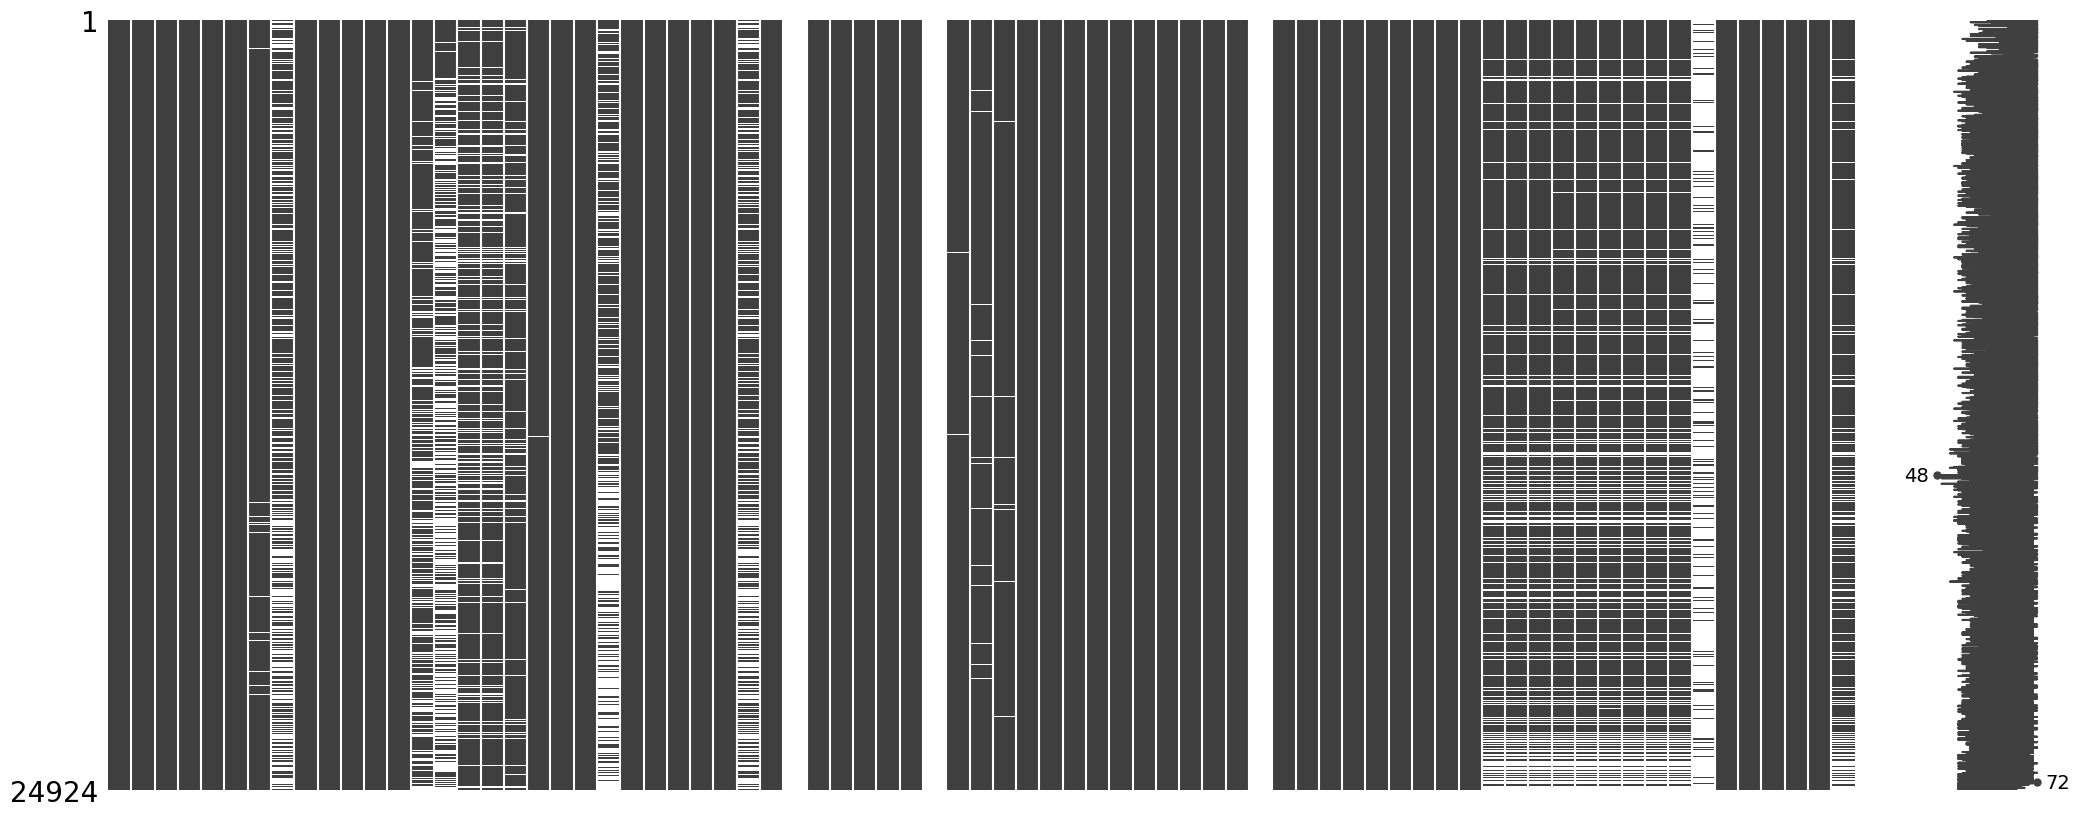

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24924 entries, 0 to 24923
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24924 non-null  int64  
 1   listing_url                                   24924 non-null  object 
 2   scrape_id                                     24924 non-null  int64  
 3   last_scraped                                  24924 non-null  object 
 4   source                                        24924 non-null  object 
 5   name                                          24920 non-null  object 
 6   description                                   24465 non-null  object 
 7   neighborhood_overview                         15266 non-null  object 
 8   picture_url                                   24924 non-null  object 
 9   host_id                                       24924 non-null 

In [8]:
df.head(25)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,256695,https://www.airbnb.com/rooms/256695,20230315024350,2023-03-15,city scrape,Trastevere color-suite,<b>The space</b><br />Apartment totally new in...,NaN,https://a0.muscache.com/pictures/4543522/a51fe...,1350540,...,4.99,4.95,4.91,NaN,t,1,1,0,0,1.54
1,258330,https://www.airbnb.com/rooms/258330,20230315024350,2023-03-15,city scrape,"Sunny with view, WiFi, A/C. Metro, Airport train.","Naturally lit apartment with Wi-Fi, flat-scree...",The apartment is located in the Tuscolano-San ...,https://a0.muscache.com/pictures/b6804ab8-3bc6...,1358462,...,4.99,4.60,4.75,NaN,t,1,1,0,0,0.55
2,137044,https://www.airbnb.com/rooms/137044,20230315024350,2023-03-15,city scrape,In Campo de 'Fiori! For families and friends i...,Your home in Rome! Located in the center of Ro...,This area is a key component of the historic ...,https://a0.muscache.com/pictures/prohost-api/H...,670337,...,4.74,4.90,4.35,NaN,t,1,1,0,0,1.02
3,137157,https://www.airbnb.com/rooms/137157,20230315024350,2023-03-15,city scrape,Super balcony in center on Romans roofs,<b>The space</b><br />Fantastic apartment with...,NaN,https://a0.muscache.com/pictures/867987/95ef7c...,486866,...,4.75,4.75,4.50,NaN,f,5,5,0,0,0.04
4,259075,https://www.airbnb.com/rooms/259075,20230315024350,2023-03-15,city scrape,"City Center: Large, Chic, Modern apartment","Renovated in January 2020, new, wide, ideal f...",City Center-Walking distance from the major po...,https://a0.muscache.com/pictures/810f6a92-b702...,1311777,...,4.89,4.71,4.68,ATR 003602\nCodice identificativo id869,t,2,2,0,0,1.29
5,137713,https://www.airbnb.com/rooms/137713,20230315024350,2023-03-15,city scrape,60sqm apt Campo de' Fiori with Wifi,<b>The space</b><br />Charming and cosy one-be...,NaN,https://a0.muscache.com/pictures/4862275/d73f8...,246365,...,4.71,4.93,4.64,NaN,t,2,2,0,0,0.91
6,137724,https://www.airbnb.com/rooms/137724,20230315024350,2023-03-15,city scrape,Studio in Campo de' Fiori with Wifi,<b>The space</b><br />35 sq/m studio in Campo ...,NaN,https://a0.muscache.com/pictures/65e84f06-c27a...,246365,...,4.70,4.93,4.63,NaN,t,2,2,0,0,1.37
7,138192,https://www.airbnb.com/rooms/138192,20230315024350,2023-03-15,city scrape,Rome Termini station double room,Spacious double room few steps away from Manzo...,"The district is: <br />full of shops, multi-et...",https://a0.muscache.com/pictures/miso/Hosting-...,674843,...,4.88,4.52,4.51,NaN,t,6,1,5,0,0.69
8,2737,https://www.airbnb.com/rooms/2737,20230315024350,2023-03-15,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
9,262254,https://www.airbnb.com/rooms/262254,20230315024350,2023-03-15,city scrape,Two independent and joined apartments,This announcement relates to the rental of two...,NEAR THE BEST ACTRACTIVE OF THE CITY<br />TRAS...,https://a0.muscache.com/pictures/3072244/c2b5a...,1374312,...,4.80,4.95,4.56,NaN,f,1,1,0,0,2.45


In [9]:
# Number of separate accomodotain units

len(df.index)

24924

In [10]:
# Number of hosts

df['host_id'].nunique()

12935

In [11]:
df_host = df.groupby('host_id').id.count().sort_values(ascending = False).head(100)

In [12]:
df_host.head(55)

host_id
23532561     239
96122546     152
201739458     83
63191555      70
8973851       57
2405376       52
51503378      49
1107433       48
316068        47
45788344      47
230950667     45
224869116     43
1369759       43
4453257       42
206380158     39
20428282      39
13766340      36
1764914       34
4417813       33
24459917      33
115777793     31
94907986      29
16611461      28
6519534       28
20607918      27
55155461      27
256680931     26
13331165      25
57568166      25
10210991      23
494485        23
9549387       22
7024674       22
73484657      22
19178087      21
20968125      21
4495963       21
51977220      21
97409859      21
94052914      21
761827        21
212194733     20
5232802       20
128751678     20
6797602       20
41170239      20
234260176     19
47959968      19
23152582      19
8110338       18
1355106       18
62082327      18
2315268       18
167149840     18
5265232       18
Name: id, dtype: int64

In [13]:

df.loc[df['host_id'] == 23532561].id.count()

239

In [14]:
df[['id', 'host_id', 'name']].loc[df['host_id'] == 23532561]

,id,host_id,name
2244,4539118,23532561,iFlat | Monti secret Garden
2429,4870901,23532561,iFlat | Spanish Steps Studio Apartment
2816,5657500,23532561,Pantheon Cozy Apartment n. 3
2817,5657827,23532561,Pantheon Cozy Apartment n. 2
2819,5658485,23532561,Pantheon Cozy Apartment n. 7
...,...,...,...
24367,824617240772357369,23532561,iFlat | Trastevere Unique Loft
24534,831724047233388666,23532561,iFlat | Vatican Elegant Apartment
24611,839654436113394668,23532561,iFlat | The Carpet Apartment
24612,839689394836536650,23532561,iFlat | The gem of the center


In [15]:
df_host = df[['id', 'host_id', 'name']].sort_values(by = 'host_id')

In [16]:
df_host

,id,host_id,name
5066,11509515,1944,WFP-FAO-ICCROM-BIOVERSITY cute private room
5502,12871422,1944,FAO/WFP/ICCROM/IFAD/UNIV.ROMA 3 single room
5045,11495251,1944,Circo Massimo/Colosseo/St Stephen's school for 4
5261,12269354,1944,Trastevere station cute miniflat
5057,11590562,1944,Colosseo/FAO/St Stephen's school apt sleeps 4
...,...,...,...
24847,843209465774334522,504566419,Casa di Claudia
24844,844035131162045447,504725606,Camera con Vista sulla Cupola di San Pietro
24877,844563379393111428,504749365,Camera da letto Matrimoniale
24810,842643043537458909,505156851,GraccHome Vaticano


In [17]:
df_host2 = df_host.groupby(['host_id'])['host_id'].count()

In [18]:
df_host2

host_id
1944         7
2353         1
3047         6
3504         5
11756        1
            ..
504566419    1
504725606    1
504749365    1
505156851    1
505209685    1
Name: host_id, Length: 12935, dtype: int64

In [19]:
df_host2.loc[df_host2== 1].count()

9007

In [20]:
df_host2.loc[df_host2 > 1].count()

3928

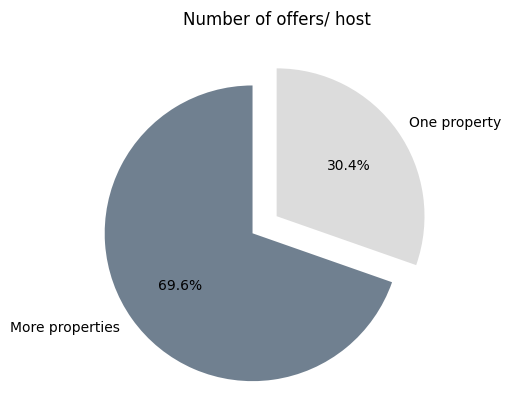

In [21]:
y = np.array([9007, 3928])
mylabels = ["More properties", "One property"]


mycolors = ["slategrey", "gainsboro"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Number of offers/ host")
plt.show() 

In [22]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### Location of the accomodations in Rome

In [23]:
# Number of different regions in Rome

df['neighbourhood_cleansed'].nunique()

15

In [24]:
# Name of the regions within Rome

df['neighbourhood_cleansed'].unique()

array(['I Centro Storico', 'VII San Giovanni/Cinecittà', 'XIII Aurelia',
       'VIII Appia Antica', 'V Prenestino/Centocelle',
       'II Parioli/Nomentano', 'XII Monte Verde', 'XIV Monte Mario',
       'XV Cassia/Flaminia', 'IX Eur', 'IV Tiburtina',
       'VI Roma delle Torri', 'X Ostia/Acilia', 'III Monte Sacro',
       'XI Arvalia/Portuense'], dtype=object)

In [25]:
df.groupby('neighbourhood_cleansed').id.count()

neighbourhood_cleansed
I Centro Storico              13894
II Parioli/Nomentano           1725
III Monte Sacro                 369
IV Tiburtina                    402
IX Eur                          312
V Prenestino/Centocelle         914
VI Roma delle Torri             196
VII San Giovanni/Cinecittà     1740
VIII Appia Antica               679
X Ostia/Acilia                  664
XI Arvalia/Portuense            416
XII Monte Verde                1202
XIII Aurelia                   1485
XIV Monte Mario                 502
XV Cassia/Flaminia              424
Name: id, dtype: int64

### License

According to the actual regulations in Rome (https://airbtics.com/airbnb-regulation-in-rome/) **CIR code** is needed for hosting for a short time.

In [26]:
df[['id', 'host_id', 'license']].head(50)

,id,host_id,license
0,256695,1350540,NaN
1,258330,1358462,NaN
2,137044,670337,NaN
3,137157,486866,NaN
4,259075,1311777,ATR 003602\nCodice identificativo id869
5,137713,246365,NaN
6,137724,246365,NaN
7,138192,674843,NaN
8,2737,3047,NaN
9,262254,1374312,NaN


In [27]:
df['license'].nunique()

3649

In [28]:
# Checking for CIR codes in the dataframe

df['license'] = df['license'].fillna('')
df_license = df[df['license'].str.contains('CIR')]


In [29]:
df_license[['id', 'host_id', 'license']]

,id,host_id,license
202,240706,1262633,CIR-2189
216,90666,491169,SCIA Comune di Roma Prot. QA/2015/29912 del 8/...
334,501912,2476686,CIR: 7549 - CIU: ATR-007981-4
517,674274,2476686,CIR: 7549 - CIU: ATR-007981-4
578,774608,2462872,CIR ID 6430 Regione Lazio / CIU ATR-004559-2
...,...,...,...
24011,802719213588782292,495672577,CIR 17675
24105,816383835180972028,496365761,CIR 19402
24527,822433921879834502,500176352,CIR: 19273 / Comunicazione N. QA/2022/38497
24723,837551838485848361,457870141,CIR: 19671


Out of 24924 listings in Rome, 108 has the needed CIR number.

In [30]:
df['calculated_host_listings_count'].sort_values(ascending = False).head(5)

22954    239
6218     239
19443    239
4739     239
21525    239
Name: calculated_host_listings_count, dtype: int64

In [31]:
df[['id','host_id','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']].head(20)

,id,host_id,calculated_host_listings_count,calculated_host_listings_count_entire_homes
0,256695,1350540,1,1
1,258330,1358462,1,1
2,137044,670337,1,1
3,137157,486866,5,5
4,259075,1311777,2,2
5,137713,246365,2,2
6,137724,246365,2,2
7,138192,674843,6,1
8,2737,3047,6,0
9,262254,1374312,1,1


### The biggest host in Rome (host_id = 23532561)

In [32]:
df_tophost = df.query('host_id == 23532561')

In [33]:
df_tophost

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2244,4539118,https://www.airbnb.com/rooms/4539118,20230315024350,2023-03-15,city scrape,iFlat | Monti secret Garden,4pax charming apartment with a private charact...,You will be in the very heart of Rome - Rione ...,https://a0.muscache.com/pictures/57303770/7cfe...,23532561,...,4.80,4.95,4.50,,t,239,238,1,0,1.30
2429,4870901,https://www.airbnb.com/rooms/4870901,20230315024350,2023-03-15,city scrape,iFlat | Spanish Steps Studio Apartment,Studio apartment very close to Spanish Steps a...,NaN,https://a0.muscache.com/pictures/c32dc77c-823a...,23532561,...,4.77,4.82,4.46,,t,239,238,1,0,1.47
2816,5657500,https://www.airbnb.com/rooms/5657500,20230315024350,2023-03-15,previous scrape,Pantheon Cozy Apartment n. 3,Cozy 4 pax apartment located in Piazza delle C...,NaN,https://a0.muscache.com/pictures/84174087/4750...,23532561,...,4.82,4.95,4.72,,t,239,238,1,0,0.80
2817,5657827,https://www.airbnb.com/rooms/5657827,20230315024350,2023-03-15,previous scrape,Pantheon Cozy Apartment n. 2,Cozy 6 pax apartment located in Piazza delle C...,NaN,https://a0.muscache.com/pictures/84145536/fab1...,23532561,...,4.69,4.88,4.52,,t,239,238,1,0,0.54
2819,5658485,https://www.airbnb.com/rooms/5658485,20230315024350,2023-03-15,previous scrape,Pantheon Cozy Apartment n. 7,Cozy 2+1 pax apartment with a beautiful terrac...,The apartment is located in Piazza delle Coppe...,https://a0.muscache.com/pictures/94395593/aefb...,23532561,...,4.88,4.95,4.60,,t,239,238,1,0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24367,824617240772357369,https://www.airbnb.com/rooms/824617240772357369,20230315024350,2023-03-15,city scrape,iFlat | Trastevere Unique Loft,Industrial-style loft with high quality fittin...,Trastevere is an old area of the downtown of R...,https://a0.muscache.com/pictures/miso/Hosting-...,23532561,...,NaN,NaN,NaN,,t,239,238,1,0,NaN
24534,831724047233388666,https://www.airbnb.com/rooms/831724047233388666,20230315024350,2023-03-15,city scrape,iFlat | Vatican Elegant Apartment,Elegant and spacious apartment located in the ...,The area where the apartment is located is one...,https://a0.muscache.com/pictures/miso/Hosting-...,23532561,...,5.00,5.00,5.00,,t,239,238,1,0,2.00
24611,839654436113394668,https://www.airbnb.com/rooms/839654436113394668,20230315024350,2023-03-15,city scrape,iFlat | The Carpet Apartment,"Just a few steps from the Spanish Steps, this ...",This beautiful apartment is located in the pic...,https://a0.muscache.com/pictures/miso/Hosting-...,23532561,...,NaN,NaN,NaN,,t,239,238,1,0,NaN
24612,839689394836536650,https://www.airbnb.com/rooms/839689394836536650,20230315024350,2023-03-15,city scrape,iFlat | The gem of the center,The apartment is located just a 7-minute walk ...,"It is the historic center of the Eternal City,...",https://a0.muscache.com/pictures/miso/Hosting-...,23532561,...,NaN,NaN,NaN,,t,239,238,1,0,NaN


In [34]:
df_tophost['license'].nunique()

3

In [35]:
df_tophost['license'].unique()

array(['', '15913', 'QA/2019/59359'], dtype=object)

In [36]:
df_tophost['calculated_host_listings_count_entire_homes'].head(1)

2244    238
Name: calculated_host_listings_count_entire_homes, dtype: int64

In [37]:
df_tophost[['calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_entire_homes']]

,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes
2244,1,238
2429,1,238
2816,1,238
2817,1,238
2819,1,238
...,...,...
24367,1,238
24534,1,238
24611,1,238
24612,1,238


In [38]:
df_tophost['calculated_host_listings_count_shared_rooms'].head(1)

2244    0
Name: calculated_host_listings_count_shared_rooms, dtype: int64

### Host with one listings

In [39]:
df_single = df.query('host_id == 505209685')

In [40]:
df_single

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
24922,846332320728407891,https://www.airbnb.com/rooms/846332320728407891,20230315024350,2023-03-15,city scrape,[Roma Centro 2KM] - 5 Stelle,Elegante e spazioso appartamento a soli 2KM da...,A soli 500 metri troverete la fermata del Tram...,https://a0.muscache.com/pictures/miso/Hosting-...,505209685,...,NaN,NaN,NaN,CIR 20155 - QA/2023/10205,t,1,1,0,0,NaN


In [41]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [42]:
df_single['availability_365']

24922    339
Name: availability_365, dtype: int64

### Dataframe focusing on the hosts

In [43]:
df.groupby(['host_id','host_name','host_since','host_response_time','host_is_superhost','host_listings_count', 'host_total_listings_count']).agg(listings=('id', 'count'))

,,,,,,,listings
host_id,host_name,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,
1944,Antonella,2008-08-13,within an hour,f,8.0,13.0,7
3047,Elif,2008-09-18,within a few hours,f,7.0,7.0,6
3504,Laura,2008-10-08,within a few hours,t,5.0,11.0,5
11756,Gea,2009-03-30,within a few hours,f,1.0,2.0,1
12456,Valeria,2009-04-06,within an hour,t,1.0,3.0,1
...,...,...,...,...,...,...,...
503411200,Francesco,2023-03-01,within a few hours,f,1.0,1.0,1
503414894,Isabella,2023-03-01,within a few hours,f,1.0,1.0,1
503495188,Nicoleta,2023-03-02,within a day,f,1.0,1.0,1


In [44]:
df.groupby(['host_id','host_name','host_since','host_is_superhost','calculated_host_listings_count']).agg(listings=('id', 'count')).sort_values(by = 'listings', ascending = False)

,,,,,listings
host_id,host_name,host_since,host_is_superhost,calculated_host_listings_count,
23532561,IFlat,2014-11-09,f,239,239
96122546,Welcome To Our Holiday Homes,2016-09-21,f,152,152
201739458,Your.Rentals,2018-07-12,f,83,83
63191555,Halldis,2016-03-16,f,70,70
8973851,Stefano,2013-09-21,f,57,57
...,...,...,...,...,...
45031736,Patrizia,2015-09-24,f,1,1
45046157,Stefania,2015-09-25,f,1,1
45050619,Lucia,2015-09-25,f,1,1


#### Replace string values with numeric in host_response_time

In [45]:
df['host_response_time'].nunique()

4

In [46]:
df['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day', nan,
       'a few days or more'], dtype=object)

In [47]:
df.loc[df['host_response_time'] == 'within an hour', 'host_response_time'] = 1


In [48]:
df.loc[df['host_response_time'] == 'within a few hours', 'host_response_time'] = 2

In [49]:
df.loc[df['host_response_time'] == 'within a day', 'host_response_time'] = 3

In [50]:
df.loc[df['host_response_time'] == 'a few days or more', 'host_response_time'] = 4

In [51]:
df['host_response_time'].unique()

array([1, 2, 3, nan, 4], dtype=object)

In [52]:
df.groupby(['host_id','host_name','host_since','host_is_superhost','calculated_host_listings_count', 'host_response_time']).agg(listings=('id', 'count'),response_time=('host_response_time', 'mean')).sort_values(by = 'listings', ascending = False)

,,,,,,listings,response_time
host_id,host_name,host_since,host_is_superhost,calculated_host_listings_count,host_response_time,,
23532561,IFlat,2014-11-09,f,239,1,239,1.0
96122546,Welcome To Our Holiday Homes,2016-09-21,f,152,1,152,1.0
201739458,Your.Rentals,2018-07-12,f,83,2,83,2.0
63191555,Halldis,2016-03-16,f,70,1,70,1.0
8973851,Stefano,2013-09-21,f,57,1,57,1.0
...,...,...,...,...,...,...,...
46070999,Giacomo,2015-10-08,t,1,2,1,2.0
46004256,Gianluca,2015-10-07,t,1,1,1,1.0
46003024,Antonello,2015-10-07,f,1,1,1,1.0


#### Adding variable host_type
**1: 1 listing**
**2: 2 listings**
**3: 3 listings**
**4: less/or equal than 10 listings**
**-5: more than 10 listings**


In [53]:
df['calculated_host_listings_count'].unique()

array([  1,   5,   2,   6,   9,  13,   3,   8,   4,  10,  21,  12,  14,
        23,   7,  47,  48,  18,  17,  52,  11,  15,  20,  28,  34,  25,
       239,  57,  16,  36,  22,  43,  49,  19,  33,  39,  31, 152,  42,
        27,  29,  45,  83,  26,  70])

In [54]:
df.loc[df['calculated_host_listings_count'] == 1, 'host_type'] = 1


In [55]:
df.loc[df['calculated_host_listings_count'] == 2, 'host_type'] = 2

In [56]:
df.loc[df['calculated_host_listings_count'] == 3, 'host_type'] = 3

In [57]:
df.loc[(df['calculated_host_listings_count'] > 3) & (df['calculated_host_listings_count'] < 11), 'host_type'] = 4

In [58]:
df.loc[(df['calculated_host_listings_count'] > 10) & (df['calculated_host_listings_count'] < 250), 'host_type'] = 5

In [59]:
df['host_type'].unique()

array([1., 4., 2., 5., 3.])

In [60]:
df.groupby(['host_id','host_name','host_is_superhost','calculated_host_listings_count', 'host_type', 'host_response_time']).agg(listings=('host_type', 'count'),response_time=('host_response_time', 'mean')).sort_values(by = 'listings', ascending = False)


,,,,,,listings,response_time
host_id,host_name,host_is_superhost,calculated_host_listings_count,host_type,host_response_time,,
23532561,IFlat,f,239,5.0,1,239,1.0
96122546,Welcome To Our Holiday Homes,f,152,5.0,1,152,1.0
201739458,Your.Rentals,f,83,5.0,2,83,2.0
63191555,Halldis,f,70,5.0,1,70,1.0
8973851,Stefano,f,57,5.0,1,57,1.0
...,...,...,...,...,...,...,...
46070999,Giacomo,t,1,1.0,2,1,2.0
46004256,Gianluca,t,1,1.0,1,1,1.0
46003024,Antonello,f,1,1.0,1,1,1.0


#### Large hosts (having more than 10 listings) response time

In [61]:
df_bighosts = df.query('host_type == 5')

In [62]:
df_bighosts.host_name.count()

3419

<Axes: >

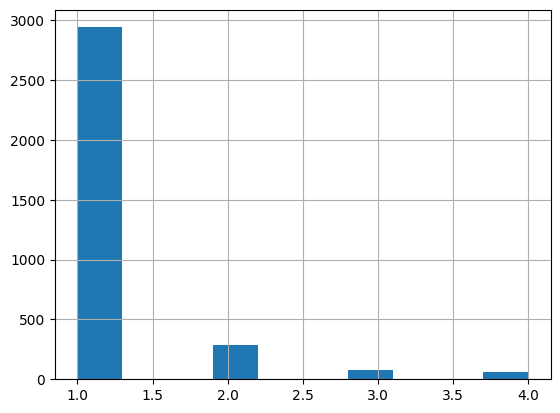

In [63]:
df_bighosts.host_response_time.hist()

In [64]:
df_bighosts.loc[df_bighosts['host_response_time'] == 1].host_name.count()

2940

In [65]:
df_bighosts.loc[df_bighosts['host_response_time'] == 2].host_name.count()

289

In [66]:
df_bighosts.loc[df_bighosts['host_response_time'] == 3].host_name.count()

74

In [67]:
df_bighosts.loc[df_bighosts['host_response_time'] == 4].host_name.count()

60

In [68]:

df_bighosts['host_response_time'].isnull().sum()

56

In [69]:
df_bighosts['host_response_time'].unique()

array([1, 2, 3, nan, 4], dtype=object)

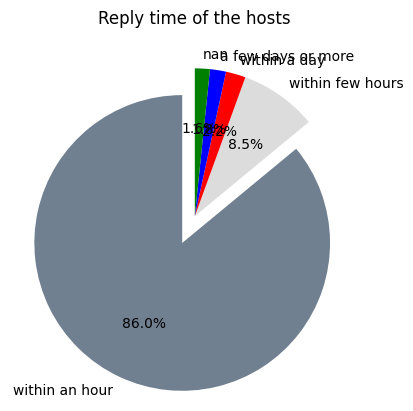

In [70]:
y = np.array([2940, 289, 74, 60, 56])
mylabels = ['within an hour', 'within few hours', 'within a day', 'a few days or more', 'nan']


mycolors = ["slategrey", "gainsboro", "red", "blue", 'green']
myexplode = [0.2, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Reply time of the hosts")
plt.show() 

86 % of the corporate hosts replied within an hour.

#### Small hosts (single listing) response time

In [71]:
df_singlehosts = df.query('host_type == 1')

In [72]:
df_singlehosts.host_name.count()

9005

<Axes: >

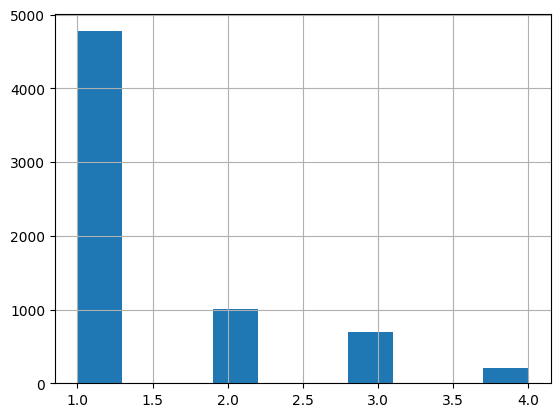

In [73]:
df_singlehosts.host_response_time.hist()

In [74]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 1].host_name.count()

4776

In [75]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 2].host_name.count()

1011

In [76]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 3].host_name.count()

690

In [77]:
df_singlehosts.loc[df_singlehosts['host_response_time'] == 4].host_name.count()

206

In [78]:
df_singlehosts['host_response_time'].isnull().sum()

2324

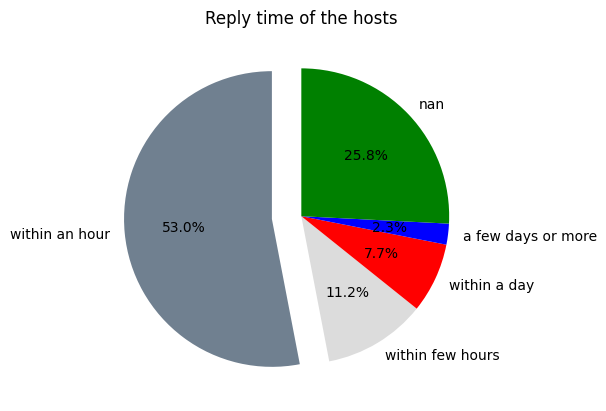

In [79]:
y = np.array([4776, 1011, 690, 206, 2324])
mylabels = ['within an hour', 'within few hours', 'within a day', 'a few days or more', 'nan']


mycolors = ["slategrey", "gainsboro", "red", "blue", 'green']
myexplode = [0.2, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Reply time of the hosts")
plt.show() 

More than half of the hosts with one apartment replying within an hour

#### Small hosts (2 listing) response time

In [80]:
df_doublehosts = df.query('host_type == 2')

In [81]:
df_doublehosts.host_name.count()

3390

<Axes: >

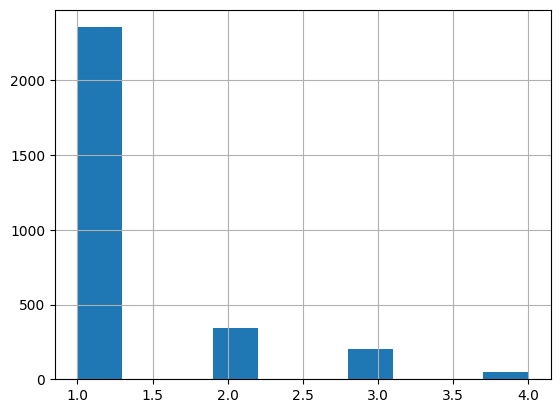

In [82]:
df_doublehosts.host_response_time.hist()

#### Middle hosts (3 listings) response time

In [83]:
df_triplehosts = df.query('host_type == 3')

In [84]:
df_triplehosts.host_name.count()

2631

<Axes: >

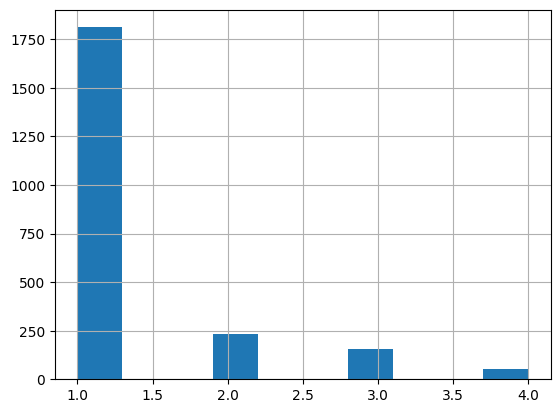

In [85]:
df_triplehosts.host_response_time.hist()

#### Middle hosts (4-10 listings) response time

In [86]:
df_middlehosts = df.query('host_type == 4')

In [87]:
df_middlehosts.host_name.count()

6471

<Axes: >

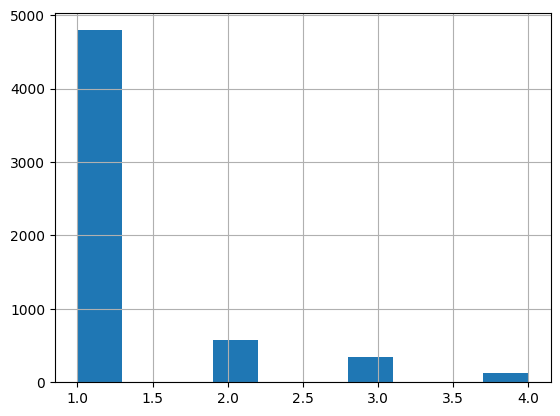

In [88]:
df_middlehosts.host_response_time.hist()

No pattern in the response time

In [89]:
df_bighosts['host_acceptance_rate']

23       100%
49        98%
50        98%
138      100%
140      100%
         ... 
24863    100%
24869     96%
24874    100%
24883     96%
24893     99%
Name: host_acceptance_rate, Length: 3419, dtype: object

In [90]:
df_bighosts['host_acceptance_rate'] = df_bighosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

/var/folders/jn/l7824d4d4699mhj74sttnc780000gn/T/ipykernel_6645/97989732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bighosts['host_acceptance_rate'] = df_bighosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100


In [92]:
df_bighosts['host_acceptance_rate'].mean()

0.9381778169014086

In [93]:
df_singlehosts['host_acceptance_rate'] = df_singlehosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100

/var/folders/jn/l7824d4d4699mhj74sttnc780000gn/T/ipykernel_6645/4247012810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singlehosts['host_acceptance_rate'] = df_singlehosts['host_acceptance_rate'].str.rstrip("%").astype(float)/100


In [94]:
df_singlehosts['host_acceptance_rate'].mean()

0.8578545006165229